## Visualize precision-recall curves

For predicting different single-cell phenotypes.

Training and testing curves for the following feature spaces:

1. CellProfiler
2. DeepProfiler (LUAD)
3. Combined CP and DP (LUAD)

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

# Load figure themes and colors
source("themes.r")
source("figure_themes.R")

In [2]:
# Set output files
output_file <- file.path(
    "figures", "pr_curves_multiclass.png"
)

In [3]:
# Feature spaces to subset
# Note: facet_labels defined in `themes.r`
focus_feature_spaces <- paste(facet_labels)
focus_feature_spaces

[1] "CellProfiler" "DeepProfiler" "CP and DP"

In [4]:
# Load data
results_dir <- file.path(
    "..", "3.evaluate_model", "evaluations", "precision_recall_curves"
)
results_file <- file.path(results_dir, "compiled_class_PR_curves.tsv")

pr_df <- readr::read_tsv(
    results_file,
    col_types = readr::cols(
        .default = "d",
        "Phenotypic_Class" = "c",
        "data_split" = "c",
        "shuffled" = "c",
        "feature_type" = "c",
        "balance_type" = "c"
    )
) %>%
    dplyr::select(!`...1`) %>%
    dplyr::mutate(feature_type_with_data_split = paste0(feature_type, data_split)) %>%
    dplyr::filter(
        balance_type == "balanced"
    )

# Order feature types for plotting
pr_df$feature_type <-
    dplyr::recode_factor(pr_df$feature_type, !!!feature_spaces)

print(dim(pr_df))
head(pr_df)

New names:
• `` -> `...1`


[1] 429300      9


Phenotypic_Class,PR_Threshold,Precision,Recall,data_split,shuffled,feature_type,balance_type,feature_type_with_data_split
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>,<chr>
ADCCM,4.849966e-18,0.03330592,1,train,False,CellProfiler,balanced,CPtrain
ADCCM,3.111641e-15,0.03331962,1,train,False,CellProfiler,balanced,CPtrain
ADCCM,1.286148e-14,0.03333333,1,train,False,CellProfiler,balanced,CPtrain
ADCCM,1.661306e-14,0.03334706,1,train,False,CellProfiler,balanced,CPtrain
ADCCM,3.628374e-14,0.03336079,1,train,False,CellProfiler,balanced,CPtrain
ADCCM,3.644341e-14,0.03337454,1,train,False,CellProfiler,balanced,CPtrain


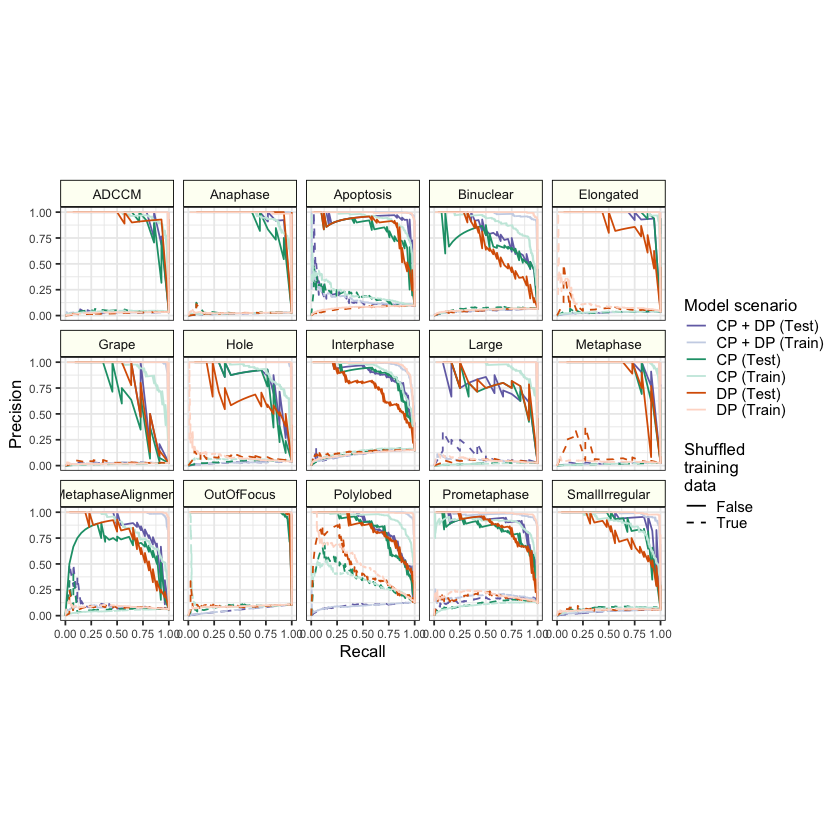

In [5]:
pr_curve_gg <- (
    ggplot(
        pr_df %>%
            dplyr::filter(feature_type %in% !!focus_feature_spaces),
        aes(x = Recall, y = Precision)
    )
    + geom_line(aes(color = feature_type_with_data_split, linetype = shuffled))
    + facet_wrap("~Phenotypic_Class", nrow = 3)
    + theme_bw()
    + xlab("Recall")
    + ylab("Precision")
    + scale_color_manual(
        name = "Model scenario",
        labels = feature_type_with_data_split_labels,
        values = feature_type_with_data_split_colors
    )
    + scale_linetype_manual(
        name = "Shuffled\ntraining\ndata",
        labels = shuffled_labels,
        values = shuffled_linetypes
    )
    + guides(
        color = guide_legend(order = 1),
        linetype = guide_legend(order = 2),
    )
    + coord_fixed()
    + figure_theme
    # Decrease spacing in legend
    + theme(
        legend.spacing.y = unit(0.1, "cm"),
        legend.box.spacing = unit(0.2, "cm"),
        legend.key.size = unit(0.7, "lines"),
        legend.key.width = unit(1, "lines")
    )
)

ggsave(output_file, pr_curve_gg, height = 5.5, width = 8.5, dpi = 500)

pr_curve_gg